In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [161]:
data = pd.read_csv("all_23_solenoids.csv")

In [162]:
data.head()

,x,y,z,bx,by,bz,particle,energy,volume
0,11.103808,-59.446527,2080.0,0.031252,-0.167316,15.745814,pi-,628.505827,Solenoid_1_FieldVolume
1,23.906895,-118.118515,380.0,0.087474,-0.432188,20.469558,pi-,1623.528484,Solenoid_1_FieldVolume
2,207.257466,-11.150241,4215.5,0.291462,-0.015680,7.872907,pi-,1621.818469,Solenoid_1_FieldVolume
3,-191.462710,-327.102853,8510.0,-0.107777,-0.184130,3.149163,pi-,1620.687602,Solenoid_1_FieldVolume
4,600.171250,-202.729059,12390.0,0.168922,-0.057059,1.574581,pi-,1619.755212,Solenoid_1_FieldVolume


In [163]:
z = np.array(data['z'].to_list())
bz = np.array(data['bz'].to_list())
bx = np.array(data['bx'].to_list())
by = np.array(data['by'].to_list())
b_mod = np.array(np.sqrt(bx**2 + by**2 + bz**2))
particles = np.array(data['particle'].to_list())
energy = np.array(data['energy'].to_list())
print(b_mod
     )

[15.74673394 20.4743069   7.87831585 ...  1.58269581 20.4721252
 20.469558  ]


In [164]:
len(bz), len(z)

(7967, 7967)

In [165]:
bin_size = 800  # mm
z_min = np.min(z)
z_max = np.max(z)

bin_edges = np.arange(z_min, z_max + bin_size, bin_size)

peak_bz = []
bin_centers = []

# Loop through bins
for i in range(len(bin_edges) - 1):
    z_start = bin_edges[i]
    z_end = bin_edges[i + 1]
    
    # Get indices within the bin
    mask = (z >= z_start) & (z < z_end)
    
    if np.any(mask):
        peak = np.max(np.abs(bz[mask]))
        peak_bz.append(peak)
        bin_centers.append((z_start + z_end) / 2)




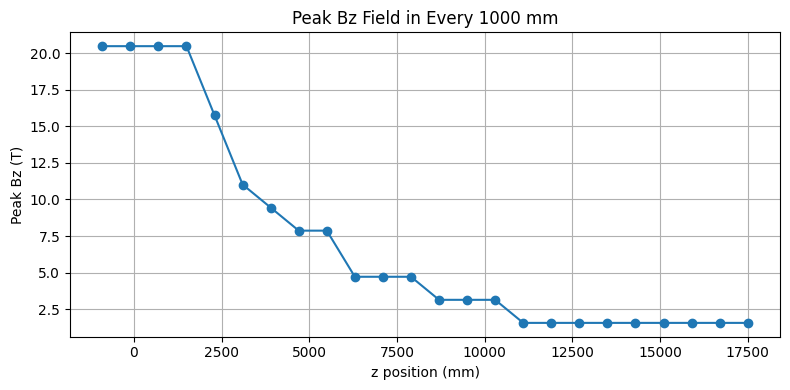

In [166]:
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, peak_bz, marker='o', linestyle='-')
plt.xlabel('z position (mm)')
plt.ylabel('Peak Bz (T)')
plt.title('Peak Bz Field in Every 1000 mm')
plt.grid(True)
plt.tight_layout()
plt.show()

In [167]:
pi_plus_pos = []
pi_plus_energy = []
pi_minus = []
mu_plus = []
mu_minus = []
for i in range(0, len(particles)):
    if particles[i] == "pi+":
        pi_plus_energy.append(energy[i])
        pi_plus_pos.append(z[i])

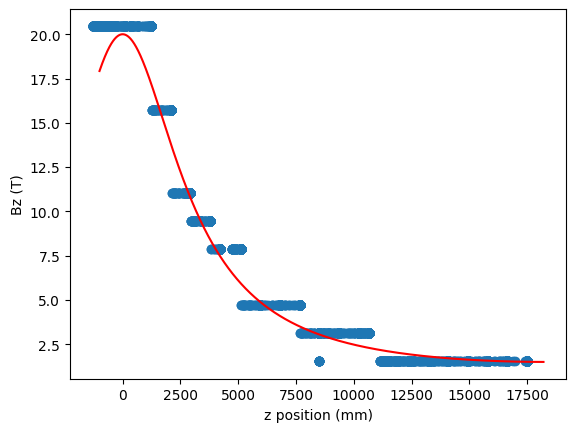

In [168]:
Bi = 20
Bf = 1.5
Lt = 18200
# -1< z < Lt
B = []

z_list = [i for i in range(-1000, 18201)] 

for zi in z_list:
    B_temp = (Bi*Bf*(Lt**3))/(Bi*(zi**2)*(3*Lt-2*zi)+Bf*((Lt-zi)**2)*(2*zi+Lt))
    B.append(B_temp)
    
plt.plot(z_list, B, color='red', label='Original Points')
plt.scatter(z, bz, marker='o', linestyle='-')
plt.xlabel('z position (mm)')
plt.ylabel('Bz (T)')
#plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.show()

In [169]:
data = pd.read_csv("6D_vector.csv")
data.head()

,Detector,ParticleType,x[cm],px[MeV/c],y[cm],py[MeV/c],z[cm],pz[MeV/c],TotalEnergy[MeV]
0,1,mu-,11.016900,248.1190,-38.38640,-256.9480,449.95,190.065,418.179
1,1,pi-,17.370400,-185.9060,4.56250,314.5480,449.95,1573.820,1621.700
2,2,pi-,33.638300,330.5290,-38.34770,152.1240,1099.95,1572.280,1619.860
3,1,mu-,-0.293039,-44.4867,-4.26466,-41.8167,449.95,997.554,1004.990
4,2,mu-,-5.091090,12.4343,-11.27960,-57.3673,1099.95,996.326,1003.630


In [170]:
det = np.array(data['Detector'].to_list())
particle = np.array(data['ParticleType'].to_list())
px = np.array(data['px[MeV/c]'].to_list())
py = np.array(data['py[MeV/c]'].to_list())
pz = np.array(data['pz[MeV/c]'].to_list())
x = np.array(data['x[cm]'].to_list())
y = np.array(data['y[cm]'].to_list())
z = np.array(data['z[cm]'].to_list())
det1_particles = []
det1_px = []
det1_py = []
det1_pz = []
det1_x = []
det1_y = []
det1_z = []
det2_particles = []
det2_px = []
det2_py = []
det2_pz = []
det2_x = []
det2_y = []
det2_z = []
det3_particles = []
det3_px = []
det3_py = []
det3_pz = []
det3_x = []
det3_y = []
det3_z = []

In [171]:
for i in range(0, len(det)):
    if det[i] == 1:
        det1_particles.append(particle[i])
        det1_px.append(px[i])
        det1_py.append(py[i])
        det1_pz.append(pz[i])
        det1_x.append(x[i])
        det1_y.append(y[i])
        det1_z.append(z[i])
    elif det[i] == 2:
        det2_particles.append(particle[i])
        det2_px.append(px[i])
        det2_py.append(py[i])
        det2_pz.append(pz[i])
        det2_x.append(x[i])
        det2_y.append(y[i])
        det2_z.append(z[i])
    elif det[i] == 3:
        det3_particles.append(particle[i])
        det3_px.append(px[i])
        det3_py.append(py[i])
        det3_pz.append(pz[i])
        det3_x.append(x[i])
        det3_y.append(y[i])
        det3_z.append(z[i])

len(det3_particles)

704

In [173]:
from collections import Counter

counts = Counter(det1_particles)
categories1 = list(counts.keys())
values1 = list(counts.values())


In [175]:
counts = Counter(det2_particles)
categories2 = list(counts.keys())
values2 = list(counts.values())

In [176]:
counts = Counter(det3_particles)
categories3 = list(counts.keys())
values3 = list(counts.values())

In [177]:
 len(det2_particles)

1404

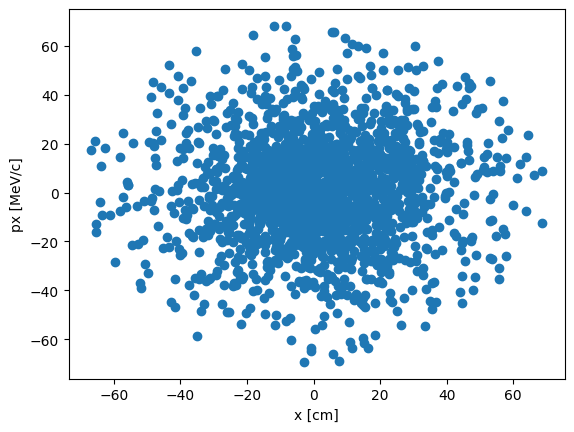

In [178]:
plt.scatter(det1_x,det1_y )
plt.xlabel("x [cm]")
plt.ylabel("px [MeV/c]")
plt.show()

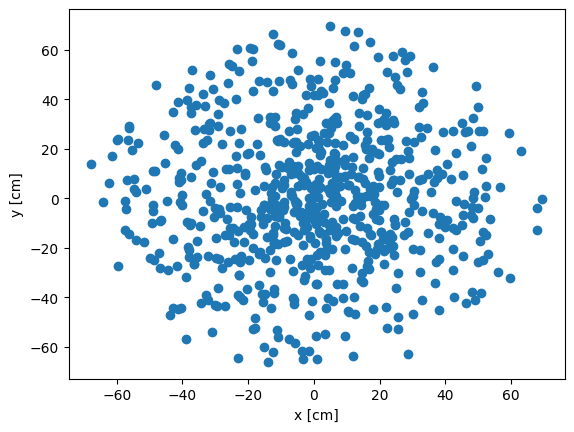

In [179]:
plt.scatter(det3_x,det3_y )
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.show()

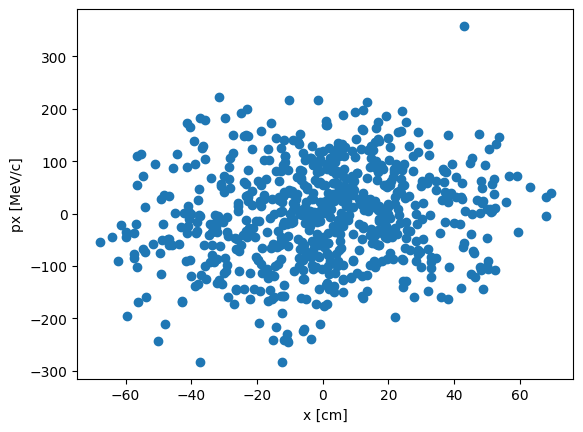

In [180]:
plt.scatter(det3_x,det3_px )
plt.xlabel("x [cm]")
plt.ylabel("px [MeV/c]")
plt.show()

In [181]:
def compute_and_plot_emittance(x_list, px_list, pz_list):
    # Convert lists to numpy arrays
    x = np.array(x_list)
    px = np.array(px_list)
    pz = np.array(pz_list)
    
    # Compute x' = px / pz
    xp = px / pz

    # Center data
    x_mean = np.mean(x)
    xp_mean = np.mean(xp)
    x_c = x - x_mean
    xp_c = xp - xp_mean

    # Compute statistical moments
    x2 = np.mean(x_c**2)
    xp2 = np.mean(xp_c**2)
    xxp = np.mean(x_c * xp_c)

    # Calculate geometric emittance
    emittance = np.sqrt(x2 * xp2 - xxp**2)
    print(f"Geometric Emittance: {emittance:.3e} mm")

    # Plotting phase space
    
    plt.scatter(x, xp)
    plt.xlabel("x [mm]")
    plt.ylabel("x' [rad]")
    plt.title("Transverse Phase Space (x vs x')")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return emittance

In [182]:
det_pos = [4, 10.5, 17.5] # in meters

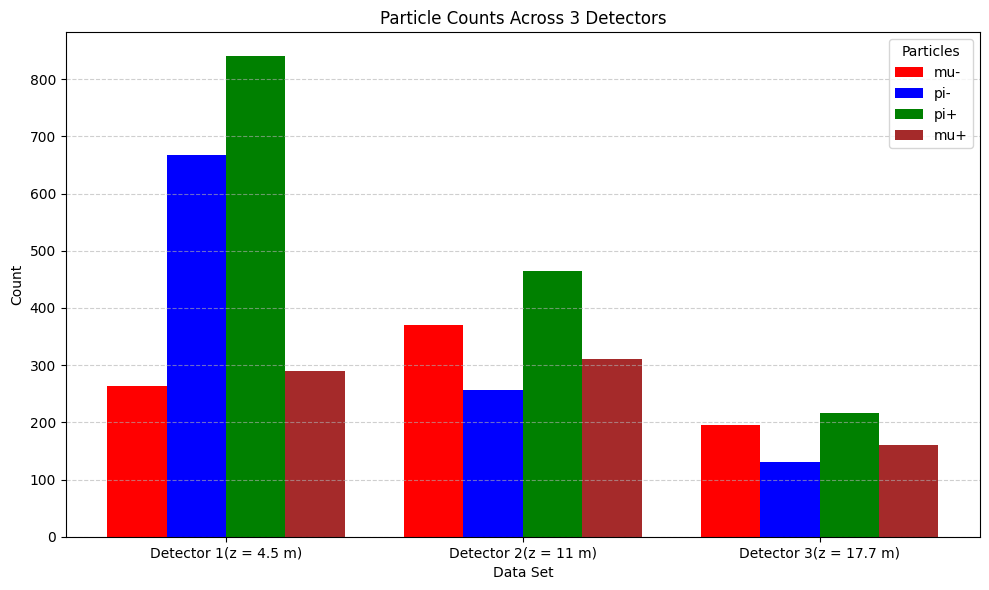

In [185]:
colors = ['red', 'blue', 'green', 'brown']


# Number of sets
n_sets = 3
x = np.arange(n_sets)  # One x-position per set (Set 1, Set 2, Set 3)
width = 0.2  # Width of each bar

# Create the plot
plt.figure(figsize=(10, 6))

for i, (particle, color) in enumerate(zip(categories1, colors)):
    values = [values1[i], values2[i], values3[i]]  # values for this particle across sets
    plt.bar(x + i * width, values, width=width, label=particle, color=color)

# X-axis setup
plt.xticks(x + width * 1.5, ['Detector 1(z = 4.5 m)', 'Detector 2(z = 11 m)', 'Detector 3(z = 17.7 m)'])
plt.xlabel('Data Set')
plt.ylabel('Count')
plt.title('Particle Counts Across 3 Detectors')
plt.legend(title='Particles')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [29]:
len(det1_particles)

1912

In [187]:

len(det3_particles)/len(det1_particles)

0.341747572815534

In [31]:

data = pd.read_csv("beam.tmp")

In [32]:
data.head()

,#x y z Px Py Pz t PDGid EvNum TrkId Parent weight
0,0.0 0.0 0.0 0.0 0.0 200.0 0.6153846153846154 -...
1,0.0 0.0 0.0 0.0 0.0 200.0 0.46153846153846156 ...
2,0.0 0.0 0.0 0.0 0.0 200.0 0.3076923076923077 -...
3,0.0 0.0 0.0 0.0 0.0 200.0 0.15384615384615385 ...
4,0.0 0.0 0.0 0.0 0.0 200.0 -0.0 -13 5 0 0 1.0


In [33]:
x, y, z, px, py, pz = np.loadtxt(
    "beam.tmp",
    comments="#",
    usecols=(0,1,2,3,4,5),
    unpack=True
)
len(x)


10020

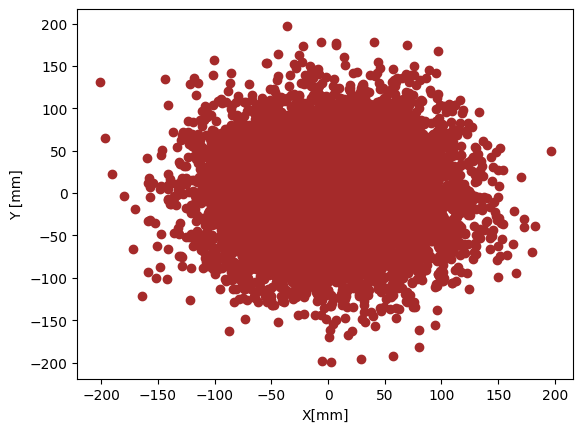

In [38]:
plt.scatter(x, y, color='brown')
plt.xlabel('X[mm]')
plt.ylabel("Y [mm]")
plt.show()